<a href="https://colab.research.google.com/github/Phalguni-Raju/NNDL/blob/main/face_recognition_attendance_system_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving Akshay Kumar_0.jpg to Akshay Kumar_0.jpg
Saving Akshay Kumar_1.jpg to Akshay Kumar_1.jpg
Saving Akshay Kumar_2.jpg to Akshay Kumar_2.jpg
Saving Alexandra Daddario_40.jpg to Alexandra Daddario_40.jpg
Saving Alexandra Daddario_41.jpg to Alexandra Daddario_41.jpg
Saving Alexandra Daddario_42.jpg to Alexandra Daddario_42.jpg
Saving Alia Bhatt_27.jpg to Alia Bhatt_27.jpg
Saving Alia Bhatt_28.jpg to Alia Bhatt_28.jpg
Saving Alia Bhatt_29.jpg to Alia Bhatt_29.jpg
Saving Amitabh Bachchan_66.jpg to Amitabh Bachchan_66.jpg
Saving Amitabh Bachchan_67.jpg to Amitabh Bachchan_67.jpg
Saving Amitabh Bachchan_68.jpg to Amitabh Bachchan_68.jpg
Saving Andy Samberg_34.jpg to Andy Samberg_34.jpg
Saving Andy Samberg_35.jpg to Andy Samberg_35.jpg
Saving Andy Samberg_36.jpg to Andy Samberg_36.jpg
Saving Anushka Sharma_54.jpg to Anushka Sharma_54.jpg
Saving Anushka Sharma_55.jpg to Anushka Sharma_55.jpg
Saving Anushka Sharma_56.jpg to Anushka Sharma_56.jpg
Saving Billie Eilish_61.jpg to Billie Eilish_6

In [2]:
!pip install face-recognition opencv-python numpy pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566166 sha256=43e4254955a9dfe49bec3b964e01118082729d6cd67e4ae6e12d18782d89e719
  Stored in directory: /root/.cache/pip/wheels/8f/47/c8/f44c5aebb7507f7c8a2c0bd23151d732d0f0bd6884ad4ac635
Successfully built face-recognition-models


In [3]:
import face_recognition
import os
import numpy as np
import pandas as pd
from datetime import datetime


In [6]:
import os
import cv2
import numpy as np


In [7]:
dataset_path = "/content/dataset"


In [9]:
import os
print(os.listdir("/content"))


['.config', 'Natalie Portman_16.jpg', 'Brad Pitt_111.jpg', 'Zac Efron_88.jpg', 'Zac Efron_87.jpg', 'Robert Downey Jr_75.jpg', 'Roger Federer_27.jpg', 'Anushka Sharma_56.jpg', 'Priyanka Chopra_31.jpg', 'Virat Kohli_39.jpg', 'Alia Bhatt_28.jpg', 'Andy Samberg_36.jpg', 'Billie Eilish_61.jpg', 'Amitabh Bachchan_66.jpg', 'Amitabh Bachchan_67.jpg', 'Virat Kohli_40.jpg', 'Akshay Kumar_1.jpg', 'Charlize Theron_58.jpg', 'Alexandra Daddario_41.jpg', 'Andy Samberg_35.jpg', 'Henry Cavill_62.jpg', 'Zac Efron_89.jpg', 'Natalie Portman_15.jpg', 'Akshay Kumar_0.jpg', 'Brad Pitt_112.jpg', 'Henry Cavill_61.jpg', 'Charlize Theron_60.jpg', 'Natalie Portman_17.jpg', 'Virat Kohli_38.jpg', 'Billie Eilish_63.jpg', 'Priyanka Chopra_32.jpg', 'Robert Downey Jr_76.jpg', 'Tom Cruise_6.jpg', 'Brad Pitt_113.jpg', 'Alexandra Daddario_42.jpg', 'Henry Cavill_60.jpg', 'Alexandra Daddario_40.jpg', 'Alia Bhatt_27.jpg', 'Andy Samberg_34.jpg', 'Akshay Kumar_2.jpg', 'Tom Cruise_4.jpg', 'Billie Eilish_62.jpg', 'Anushka Sharma

In [10]:
dataset_path = "/content"


In [11]:
import os
import cv2

images = []
labels = []

for file in os.listdir(dataset_path):
    if file.lower().endswith(('.jpg', '.png', '.jpeg')):

        img_path = os.path.join(dataset_path, file)

        # Extract label from filename
        label = file.split("_")[0]

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        images.append(img)
        labels.append(label)

print("Total images:", len(images))
print("Unique people:", set(labels))


Total images: 51
Unique people: {'Anushka Sharma', 'Robert Downey Jr', 'Virat Kohli', 'Billie Eilish', 'Henry Cavill', 'Alexandra Daddario', 'Priyanka Chopra', 'Amitabh Bachchan', 'Brad Pitt', 'Zac Efron', 'Andy Samberg', 'Charlize Theron', 'Tom Cruise', 'Roger Federer', 'Akshay Kumar', 'Natalie Portman', 'Alia Bhatt'}


In [12]:
!pip install keras-facenet mtcnn
from keras_facenet import FaceNet
from mtcnn.mtcnn import MTCNN
import numpy as np


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 72.8 MB/s eta 0:00:00
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10367 sha256=dd5c2c265f81c04f4b7b9895b815c92b4ea9a35dc2fca9a10863404a36646bc3
  Stored in directory: /root/.cache/pip/wheels/05/b0/f5/19ac49fedc10b1df3ee56b096edbcfa39d45794fccc6bcdbbf
Successfully built keras-facenet


In [13]:
embedder = FaceNet()
detector = MTCNN()

embeddings = []
valid_labels = []

for img, label in zip(images, labels):
    faces = detector.detect_faces(img)

    if len(faces) == 0:
        continue   # skip images with no face

    x, y, w, h = faces[0]['box']
    face = img[y:y+h, x:x+w]
    face = cv2.resize(face, (160,160))

    embedding = embedder.embeddings([face])[0]
    embeddings.append(embedding)
    valid_labels.append(label)

print("Embeddings shape:", np.array(embeddings).shape)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━

In [15]:
from sklearn.preprocessing import LabelEncoder
import pickle

encoder = LabelEncoder()
labels_encoded = encoder.fit_transform(valid_labels)

# Save encoder
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)
    from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(256, activation='relu', input_shape=(512,)),
    Dense(128, activation='relu'),
    Dense(len(set(labels_encoded)), activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
history = model.fit(
    np.array(embeddings),
    labels_encoded,
    epochs=15,
    batch_size=32,
    validation_split=0.2
)


Epoch 1/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 238ms/step - accuracy: 0.0708 - loss: 2.8144 - val_accuracy: 0.0909 - val_loss: 2.8119
Epoch 2/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.6854 - loss: 2.7277 - val_accuracy: 0.2727 - val_loss: 2.7796
Epoch 3/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.9125 - loss: 2.6501 - val_accuracy: 0.3636 - val_loss: 2.7463
Epoch 4/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.9729 - loss: 2.5770 - val_accuracy: 0.3636 - val_loss: 2.7091
Epoch 5/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 1.0000 - loss: 2.4912 - val_accuracy: 0.3636 - val_loss: 2.6704
Epoch 6/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 1.0000 - loss: 2.4036 - val_accuracy: 0.4545 - val_loss: 2.6275
Epoch 7/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 1.0000 - loss: 2.2986 - val_accuracy: 0.4545 - val_loss: 2.5819
Epoch 8/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 1.0000 - loss: 2.1838 - val_accuracy: 0.5455 - val_loss: 2.533

In [17]:
model.save("face_attendance_model.h5")


In [18]:
import pandas as pd
from datetime import datetime

def mark_attendance(predicted_label):
    name = encoder.inverse_transform([predicted_label])[0]
    time = datetime.now().strftime("%H:%M:%S")

    df = pd.DataFrame([[name, time]], columns=["Name", "Time"])
    df.to_csv("attendance.csv", mode='a', header=False, index=False)

    print(f"✅ {name} marked present")


In [23]:
from google.colab import files
uploaded = files.upload()


Saving student.webp to student.webp


In [33]:
for test_img_path in uploaded.keys():

    img = cv2.imread(test_img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    faces = detector.detect_faces(img)

    for face_data in faces:
        x, y, w, h = face_data['box']
        face = img[y:y+h, x:x+w]
        face = cv2.resize(face, (160,160))

        embedding = embedder.embeddings([face])[0]
        prediction = model.predict(np.expand_dims(embedding, axis=0), verbose=0)
        predicted_label = np.argmax(prediction)

        mark_attendance(predicted_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
✅ Akshay Kumar marked present
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
✅ Alia Bhatt marked present


In [46]:
import numpy as np
from collections import defaultdict

person_embeddings = defaultdict(list)

for emb, label in zip(embeddings, valid_labels):
    person_embeddings[label].append(emb)

# Compute mean embedding per person
mean_embeddings = {
    person: np.mean(embs, axis=0)
    for person, embs in person_embeddings.items()
}


In [49]:
print("People in trained dataset:")
print(mean_embeddings.keys())


People in trained dataset:
dict_keys(['Natalie Portman', 'Brad Pitt', 'Zac Efron', 'Robert Downey Jr', 'Roger Federer', 'Anushka Sharma', 'Priyanka Chopra', 'Virat Kohli', 'Alia Bhatt', 'Andy Samberg', 'Billie Eilish', 'Amitabh Bachchan', 'Akshay Kumar', 'Charlize Theron', 'Alexandra Daddario', 'Henry Cavill', 'Tom Cruise'])


Saving student.webp to student (5).webp
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
✅ PRESENT : Alia Bhatt (Distance = 0.73)


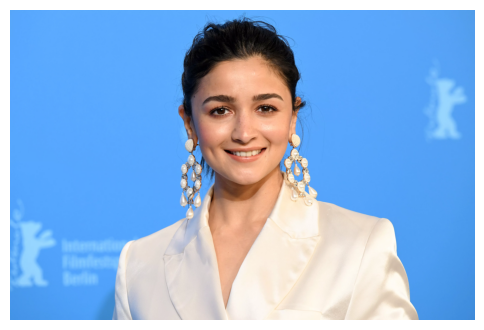

In [52]:
import cv2
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

DIST_THRESHOLD = 0.9   # typical FaceNet threshold (0.8–1.1)

uploaded = files.upload()
test_img_path = list(uploaded.keys())[0]

img = cv2.imread(test_img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

faces = detector.detect_faces(img)

if len(faces) == 0:
    print("❌ ABSENT (No face detected)")

else:
    x, y, w, h = faces[0]['box']
    x, y = max(0, x), max(0, y)

    face = img[y:y+h, x:x+w]
    face = cv2.resize(face, (160,160))

    test_emb = embedder.embeddings([face])[0]

    # Compute distances
    distances = {
        person: np.linalg.norm(test_emb - mean_emb)
        for person, mean_emb in mean_embeddings.items()
    }

    # Find closest person
    best_person = min(distances, key=distances.get)
    best_distance = distances[best_person]

    if best_distance <= DIST_THRESHOLD:
        print(f"✅ PRESENT : {best_person} (Distance = {best_distance:.2f})")
    else:
        print(f"❌ ABSENT (Distance = {best_distance:.2f})")
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.imshow(img)
plt.axis("off")
plt.show()


Saving Camila Cabello_68.jpg to Camila Cabello_68.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
❌ ABSENT (Distance = 1.19)


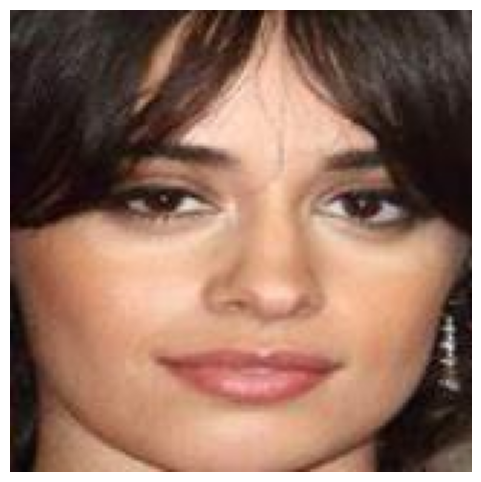

In [53]:
import cv2
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

DIST_THRESHOLD = 0.9   # typical FaceNet threshold (0.8–1.1)

uploaded = files.upload()
test_img_path = list(uploaded.keys())[0]

img = cv2.imread(test_img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

faces = detector.detect_faces(img)

if len(faces) == 0:
    print("❌ ABSENT (No face detected)")

else:
    x, y, w, h = faces[0]['box']
    x, y = max(0, x), max(0, y)

    face = img[y:y+h, x:x+w]
    face = cv2.resize(face, (160,160))

    test_emb = embedder.embeddings([face])[0]

    # Compute distances
    distances = {
        person: np.linalg.norm(test_emb - mean_emb)
        for person, mean_emb in mean_embeddings.items()
    }

    # Find closest person
    best_person = min(distances, key=distances.get)
    best_distance = distances[best_person]

    if best_distance <= DIST_THRESHOLD:
        print(f"✅ PRESENT : {best_person} (Distance = {best_distance:.2f})")
    else:
        print(f"❌ ABSENT (Distance = {best_distance:.2f})")
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.imshow(img)
plt.axis("off")
plt.show()
